Multi Level Peceptron 

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [8]:
df = pd.read_csv('star_classification.csv')
df = df[0:20000]  # take the first 20.000 samples

In [9]:
numerical_features = ["u", "g", "r", "i", "z"]
data = df[numerical_features].values

In [10]:
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
x_standardized = (data - data_mean) / data_std


In [11]:
class_mapping = {'GALAXY': 0, 'QSO': 1, 'STAR': 2}
df['class_numeric'] = df['class'].map(class_mapping)
y = df['class_numeric'].values


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.2, random_state=42)


In [25]:
# convert into PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [26]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    
    def forward(self, x):
        return self.layers(x)


hyperparameters


In [20]:

input_size = X_train.shape[1]
hidden_size = 64  
output_size = len(class_mapping)
learning_rate = 0.001
num_epochs = 100

In [21]:
model = MLP(input_size, hidden_size, output_size)


In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
test_accuracies = []


In [29]:
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        _, predicted = torch.max(test_outputs, 1)
        accuracy = (predicted == y_test_tensor).float().mean().item()
        test_accuracies.append(accuracy)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}')



Epoch [10/100], Loss: 0.5884, Test Accuracy: 0.7770
Epoch [20/100], Loss: 0.5722, Test Accuracy: 0.7860
Epoch [30/100], Loss: 0.5548, Test Accuracy: 0.7962
Epoch [40/100], Loss: 0.5378, Test Accuracy: 0.8033
Epoch [50/100], Loss: 0.5211, Test Accuracy: 0.8100
Epoch [60/100], Loss: 0.5056, Test Accuracy: 0.8180
Epoch [70/100], Loss: 0.4920, Test Accuracy: 0.8227
Epoch [80/100], Loss: 0.4807, Test Accuracy: 0.8320
Epoch [90/100], Loss: 0.4714, Test Accuracy: 0.8372
Epoch [100/100], Loss: 0.4637, Test Accuracy: 0.8395


In [36]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8395


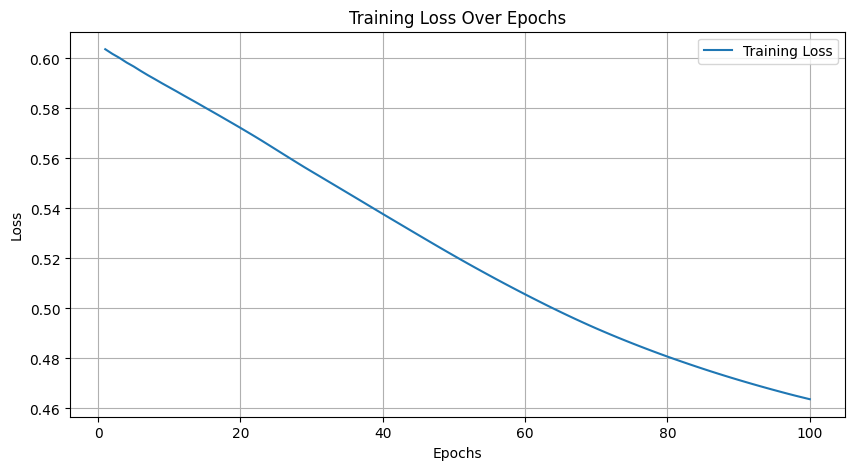

In [39]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

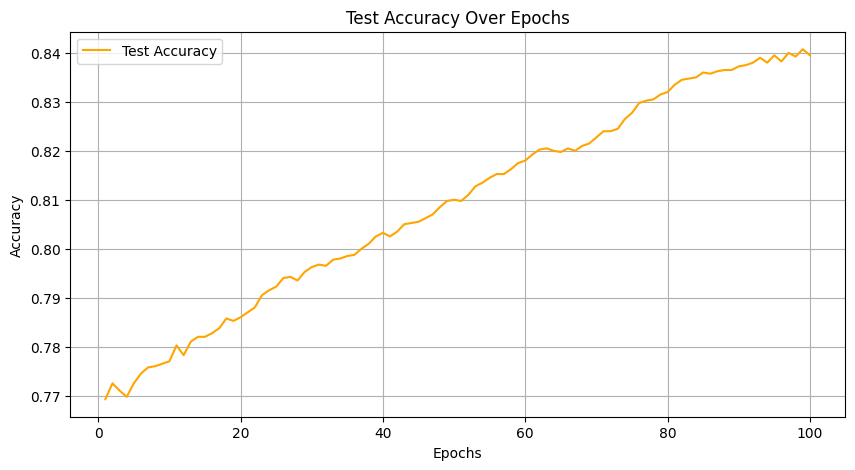

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()